In [1]:
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:75% !important; }</style>"))

import csv
from datetime import datetime
from datetime import timedelta
#from struct import pack
import os
import gc
from numpy import abs, max 
import scipy
#from scipy import io
import numpy as np
from matplotlib import pyplot as plt
#from scipy.signal import butter, lfilter
from scipy import signal
#from scipy.signal import blackman
#from scipy.signal import periodogram
#import gc
#import os
import sys
import pandas as pd
#from sklearn.decomposition import PCA
from tqdm import tqdm
from scipy.spatial import distance
from scipy import spatial

gc.enable()

video_start = '20190501'#'20190327'#'20181220' #YYYYMMDD
video_end = '20190501'#'20190327'#'20181220' #YYYYMMDD
data_path = '/data/'
sensor_list = ["acc_w","wifi"]#["gyro","acc2","acc_w","wifi","magnetic"]

temp_video_start = video_start[0:4] + "/" + video_start[4:6] + "/" +video_start[6:8]
temp_video_end = video_end[0:4] + "/" + video_end[4:6] + "/" +video_end[6:8]
print temp_video_start
print temp_video_end

video_startdatte = datetime.strptime(temp_video_start,'%Y/%m/%d')
video_enddate = datetime.strptime(temp_video_end,'%Y/%m/%d')

2019/05/01
2019/05/01


In [2]:
root = "env/"

In [3]:
envs = os.listdir(root)
envs = envs[0:len(envs)-1]
envs = [int(x) for x in envs]
envs.sort()

print "Please select a testing environment from the following environments list:"

for i in envs:
    print "Environment: (",i,")"
    
test_env = raw_input("Testing environment ")

test_env = int(test_env)

Please select a testing environment from the following environments list:
Environment: ( 5 )
Environment: ( 6 )
Environment: ( 8 )
Environment: ( 9 )
Environment: ( 10 )
Testing environment 5


In [4]:
envs.remove(test_env)
train_env=envs

In [5]:
train_env

[6, 8, 9, 10]

In [6]:
train_root = root + str(test_env) + "/dat/" + "train_dat/"
test_root = root + str(test_env) + "/dat/" + "test_dat/" 

In [7]:
motif_representatives = pd.read_csv("env/" + str(test_env) + "/dat/train_dat/" + "motif_representatives", header=None)

In [8]:
acc = pd.read_csv("env/" + str(test_env) + "/dat/" + "acc")
location_list = pd.read_csv("env/" + str(test_env) + "/dat/" + "labels")
acc.drop(["Unnamed: 0"], axis=1,inplace=True)
location_list.drop(["Unnamed: 0"], axis=1,inplace=True)

In [9]:
len(location_list)

5001

In [10]:
len(acc)

5001

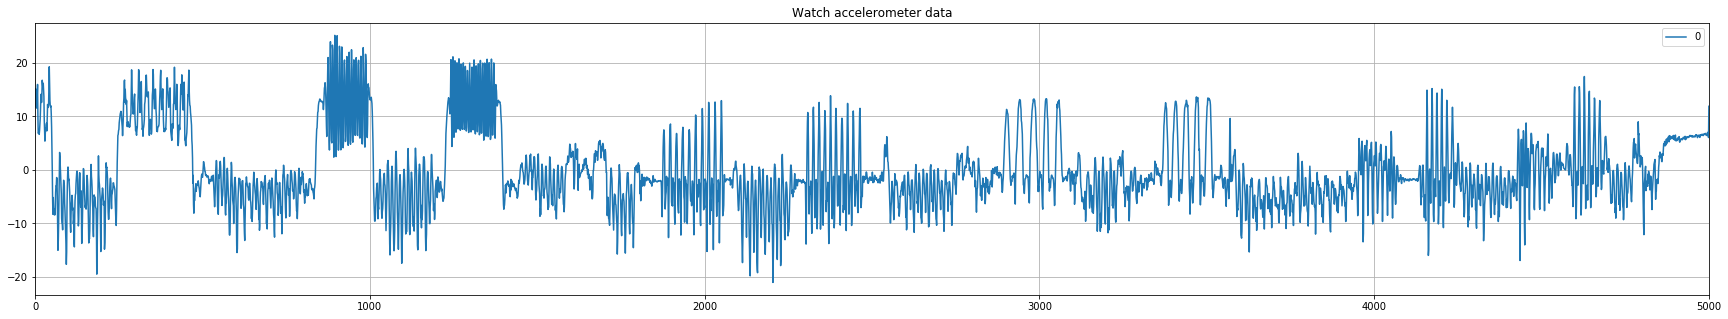

In [11]:
acc.plot(figsize = (30,5),title="Watch accelerometer data",grid=1,xlim=[0,len(acc)])

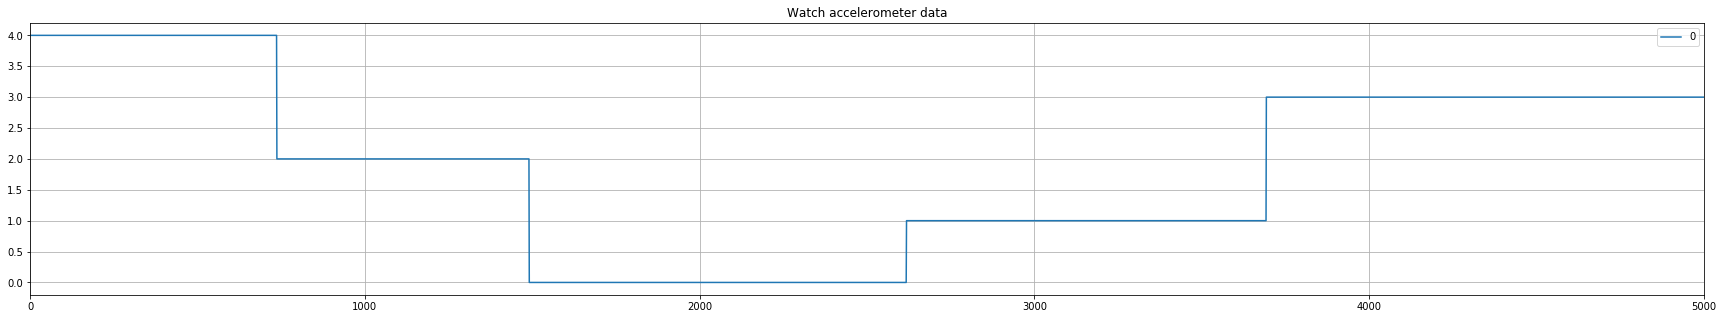

In [12]:
location_list.plot(figsize = (30,5),title="Watch accelerometer data",grid=1,xlim=[0,len(location_list)])

In [13]:
motif_representatives.index = motif_representatives[0]

In [14]:
ids = motif_representatives.index
ids = ids.astype(int)

In [15]:
motif_representatives.drop([0], axis=1,inplace=True)

from dtw import dtw

window_size = len(motif_representatives.values[0])

for z in tqdm(range(0,len(acc))):
    dists = []
    if z>window_size/2 and z<len(acc)-window_size/2:
        candid = acc[z-window_size/2:z+window_size/2]
        for rep in motif_representatives.values:
            #print spatial.distance.cosine(rep, candid)
        #break    
            x = rep
            y = candid.values
            euclidean_norm = lambda x, y: np.abs(x - y)
            d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=euclidean_norm)
            dists.append(d)
        break

## Cosine distance

In [16]:
discovered_motifs = []
window_size = len(motif_representatives.values[0])
dist = []

for z in tqdm(range(0,len(acc))):
    sim = []
    di = []
    if z>=window_size/2 and z<len(acc)-window_size/2:
        
        candid = acc[z-window_size/2:z+window_size/2].values.reshape(-1)
        for rep in motif_representatives.values:
            sim.append(spatial.distance.cosine(rep, candid))
            #x = rep.tolist()
            #y = candid
            #euclidean_norm = lambda x, y: np.abs(x - y)
            #d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=euclidean_norm)
            #sim.append(d)
        sim = sim/max(sim)
        m=0.0
        for s in sim:
            if s>m:
                m=s
                
        w = np.array(np.where(sim == m))
        di.extend(np.append(np.array(ids[w[0][0]]),np.array(candid)))
        discovered_motifs.append(di)
        dist.append(sim)
        #discovered_motifs.append(dm)    

100%|██████████| 5001/5001 [00:46<00:00, 108.19it/s]


#from dtaidistance import dtwfrom dtaidistance import dtw
discovered_motifs = []
window_size = len(motif_representatives.values[0])

for z in tqdm(range(0,len(acc))):
    sim = []
    #dm = []
    #if z>window_size/2 and z<len(acc)-window_size/2:

    candid = acc[z-window_size/2:z+window_size/2].values.reshape(-1)
    if z<window_size/2:
        candid = acc[0:z+window_size/2].values.reshape(-1)
    if z>len(acc)-window_size/2:
        candid = acc[z-window_size/2:len(acc)].values.reshape(-1)
    
    for rep in motif_representatives.values:
        #sim.append(spatial.distance.cosine(rep, candid))
        x = rep.tolist()
        y = candid
        #print len(candid)
        euclidean_norm = lambda x, y: np.abs(x - y)
        d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=euclidean_norm)
        sim.append(d)
    sim = sim/max(sim)
    m=1.0
    for s in sim:
        if s<m:
            m=s

    w = np.array(np.where(sim == m))
    discovered_motifs.append(np.append(np.array(ids[w[0][0]]),candid.T))
    #discovered_motifs.append(dm)    

from cdtw import pydtw 
discovered_motifs = []
window_size = len(motif_representatives.values[0])
disc_mot_list = [] 
dist = []

for z in tqdm(range(0,len(acc))):
    sim = []
    di = []
    #if z>window_size/2 and z<len(acc)-window_size/2:

    candid = acc[z-window_size/2:z+window_size/2].values.reshape(-1)
    if z<window_size/2:
        candid = acc[0:z+window_size/2].values.reshape(-1)
        #print candid
        
    if z>len(acc)-window_size/2:
        candid = acc[z-window_size/2:len(acc)].values.reshape(-1)
    
    for rep in motif_representatives.values:
        #sim.append(spatial.distance.cosine(rep, candid))
        x = rep.tolist()
        y = candid
        #print len(candid)
        #euclidean_norm = lambda x, y: np.abs(x - y)
        #d, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=euclidean_norm)
        #d = dtw.distance_fast(s1, s2)
        d = pydtw.dtw(x,y).get_dist()
        sim.append(d)
    sim = sim/max(sim)
    m=sim.max()
    for s in sim:
        if s<m and s<0.01:
            m=s

    w = np.array(np.where(sim == m))
    disc_mot_list.append(np.array(ids[w[0][0]]))
    di.extend(np.append(np.array(ids[w[0][0]]),np.array(candid)))
    discovered_motifs.append(di)
    dist.append(sim)
    #discovered_motifs.append((np.append(np.array(ids[w[0][0]]),candid)).T.tolist())
    #discovered_motifs.append(dm)   


In [17]:
discovered_motifs = pd.DataFrame(discovered_motifs)

In [18]:
len(dist)

4901

In [19]:
discovered_motifs.to_csv(test_root + "discovered_motifs", header=False, index=False)

# Discovered motifs frequency calculation

In [20]:
clusters = discovered_motifs[0].values

In [21]:
clusters

array([32., 32., 32., ..., 52., 52., 52.])

for i in range(0,len(dist)):
    if dist[i].min()>0.9:
        clusters[i] = np.nan

In [22]:
dist[4000]

array([0.66943515, 0.64164262, 1.        , 0.40130171, 0.57022175,
       0.67303574, 0.62009324, 0.66658812, 0.64400729, 0.65383047,
       0.63516979, 0.60639814, 0.59809774, 0.63149509, 0.69952447,
       0.77709142, 0.84056532, 0.86002981, 0.81571315, 0.62335769,
       0.56819821, 0.71994501, 0.64920602, 0.60203331, 0.65658814,
       0.73428681, 0.68918824, 0.63277172, 0.75067957, 0.73674576,
       0.7875297 , 0.5435626 , 0.94825834, 0.8514439 , 0.79173564,
       0.72448002, 0.63029958, 0.38974412, 0.44896694, 0.85856759,
       0.8427003 , 0.69520917, 0.7496336 , 0.57626493, 0.73168194,
       0.63230849, 0.76699344, 0.69031862, 0.68981078, 0.72725677,
       0.79277495, 0.62706501, 0.62370826, 0.7448299 , 0.86291495,
       0.44795257, 0.64158909, 0.82501676, 0.70018678, 0.65764007,
       0.84783931, 0.77457747, 0.76383272, 0.86754667, 0.57801966,
       0.65170818, 0.74995937, 0.66647731, 0.75845377, 0.73332929,
       0.85993799, 0.65838594, 0.8696391 , 0.79246637, 0.78367

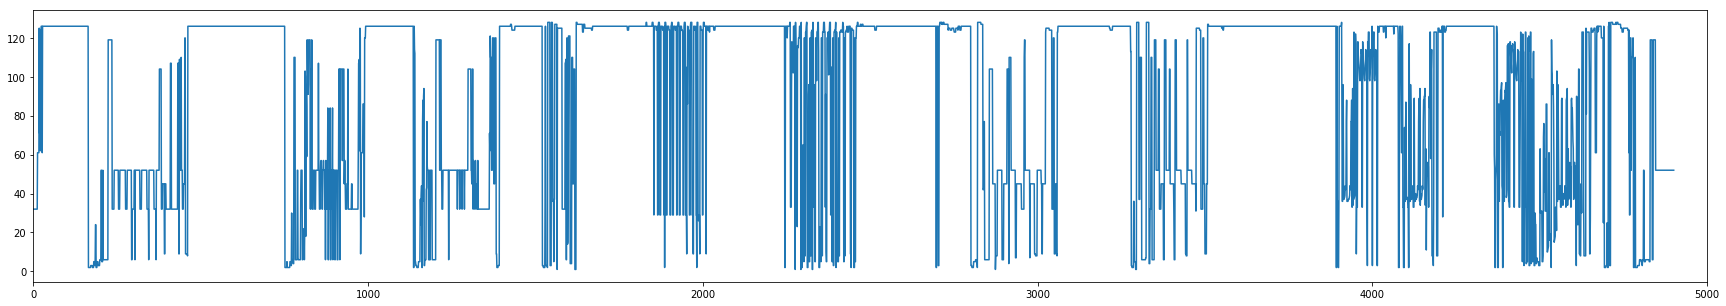

In [23]:
plt.figure(figsize=(30,5))
plt.xlim(0,5000)
plt.plot(clusters)

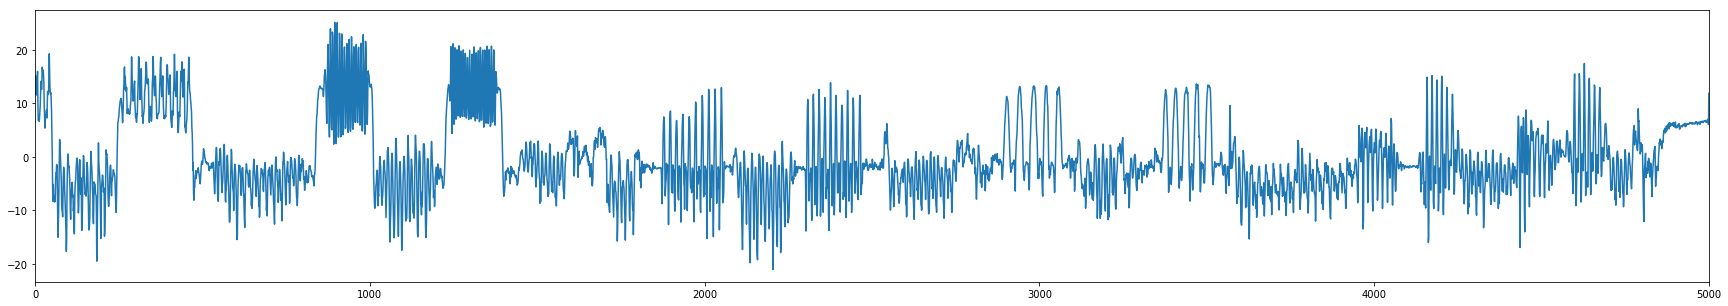

In [24]:
plt.figure(figsize=(30,5))
plt.xlim(0,len(acc))
plt.plot(acc)

In [25]:
right = []
right += 50*[clusters[-1]]

In [26]:
left = []
left += 50*[clusters[0]]

In [27]:
clusters = np.append(left,clusters)

In [28]:
clusters = np.append(left,clusters)

In [29]:
len(acc)

5001

(0, 5001)

<Figure size 2160x360 with 0 Axes>

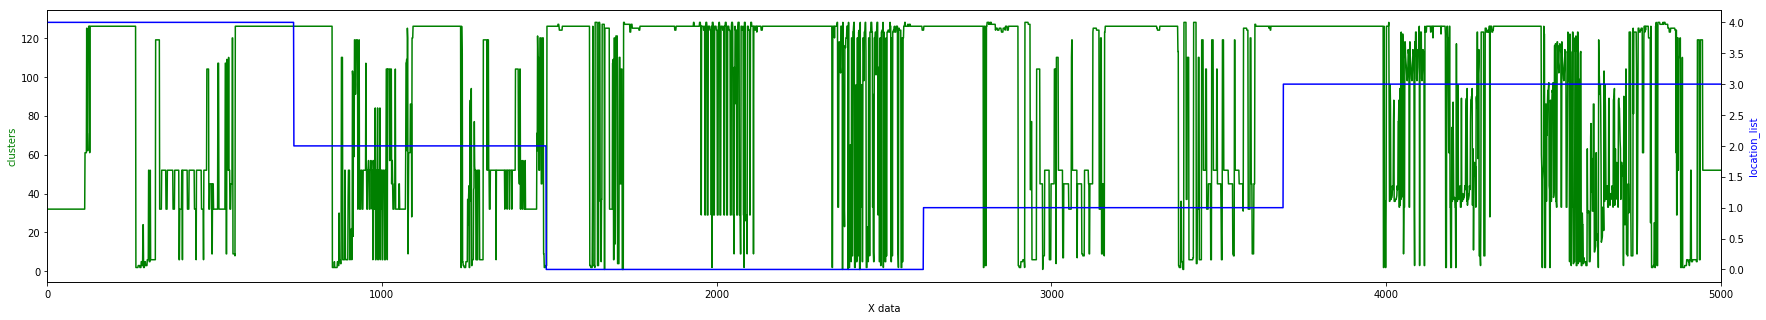

In [30]:
x = np.arange(0, len(clusters))

plt.figure(figsize=(30,5))
fig, ax1 = plt.subplots(figsize=(30,5))

ax2 = ax1.twinx()
ax1.plot(x, clusters, 'g-')
ax2.plot(x, location_list, 'b-')

ax1.set_xlabel('X data')
ax1.set_ylabel('clusters', color='g')
ax2.set_ylabel('location_list', color='b')
plt.xlim(0,len(location_list))

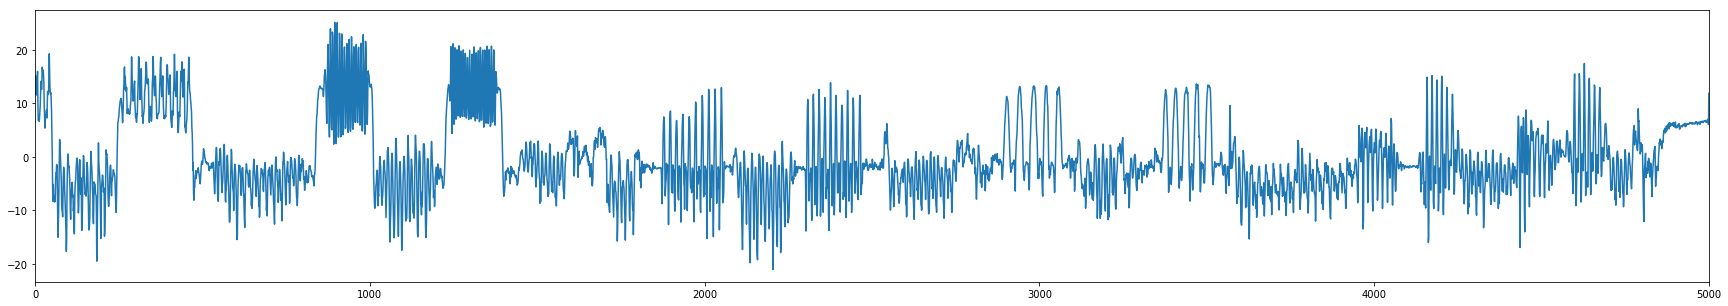

In [31]:
plt.figure(figsize=(30,5))
plt.xlim(0,len(acc))
plt.plot(acc)

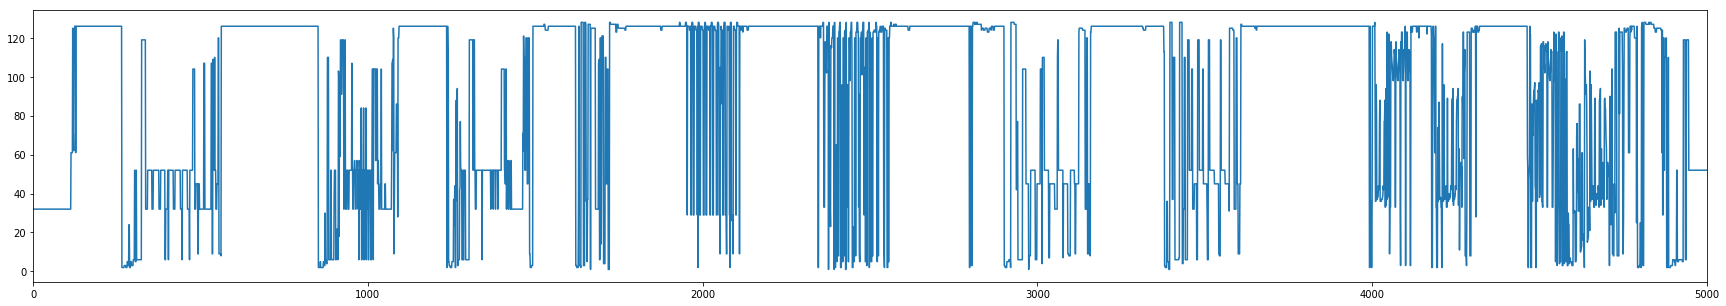

In [32]:
plt.figure(figsize=(30,5))
plt.xlim(0,len(clusters))
plt.plot(clusters)

In [33]:
discovered_motifs = []
window_size = len(motif_representatives.values[0])
dist = []
rep = motif_representatives.T[70]
sim = []
for z in tqdm(range(0,len(acc))):
    
    di = []
    if z>=window_size/2 and z<len(acc)-window_size/2:
        
        candid = acc[z-window_size/2:z+window_size/2].values.reshape(-1)
        
        sim.append(spatial.distance.cosine(rep, candid))



100%|██████████| 5001/5001 [00:02<00:00, 2468.19it/s]


In [34]:
clusters = sim

In [35]:
right = []
right += 50*[clusters[-1]]

left = []
left += 50*[clusters[0]]

clusters = np.append(left,clusters)

clusters = np.append(left,clusters)

In [36]:
cluster_list = list(set(clusters))

In [37]:
cluster_list.sort()

In [38]:
place_times_cluster = np.vstack((location_list.values.reshape(-1), clusters)).T

In [39]:
location_list_set = list(set(location_list.values.reshape(-1)))
location_list_set.sort()

In [40]:
env_mot_list = []

for env in location_list_set:
    #print env
    pmcombo = place_times_cluster[place_times_cluster[:,0]==env]
    mot_list = []
    for motif in ids:#set(pmcombo[:,1]):
        envmot = pmcombo[:,1]
        #print int(motif), envmot.tolist().count(motif)
        mot_list.append([int(motif), envmot.tolist().count(motif)])
        
    env_mot_list.append([int(env),mot_list])    
    #for motif in set(times_cluster):
     #   print no, times_cluster.count(no)

In [41]:
motif_occur = []
for mot_type in cluster_list:
    motif_occur.append([mot_type,clusters.tolist().count(mot_type)])

In [42]:
mot_sum = pd.DataFrame(motif_occur)[1].sum()

In [43]:
mot_ratio = []
for mots in motif_occur:
    mot_ratio.append([mots[0],float(mots[1])/mot_sum])

In [44]:
feature_list = []
for x in range(0,len(env_mot_list)):
    for y in range(0,len(env_mot_list[x][1])):
        #print y
        feature_list.append([x,y,float(env_mot_list[x][1][y][1])/mot_sum])

In [45]:
feature_list = pd.DataFrame(feature_list)

In [46]:
feature_list

,0,1,2
0,0,0,0.0
1,0,1,0.0
2,0,2,0.0
3,0,3,0.0
4,0,4,0.0
5,0,5,0.0
6,0,6,0.0
7,0,7,0.0
8,0,8,0.0
9,0,9,0.0


In [266]:
feature_list.to_csv(test_root + "features", header=False, index=False)

In [267]:
test_root

'env/10/dat/test_dat/'